##### How to use GPU using PyTorch

In [67]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

In [48]:
# Set random seeds for reproducibility 
torch.manual_seed(42)

In [49]:
#Check for GPU and MPS and set the device 

device = torch.device("mps" if torch.backends.mps.is_available() else "cuda" if torch.cuda.is_available() else "cpu")
print(f"Currently the machine is using : {device}")

Currently the machine is using : mps


In [50]:
df = pd.read_csv("/Users/mekalathuruchenchaiah/Desktop/Programming/Deep Learing-PyTorch/data/fashion-mnist_test.csv")
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
df.shape # Shape of the dataset

(10000, 785)

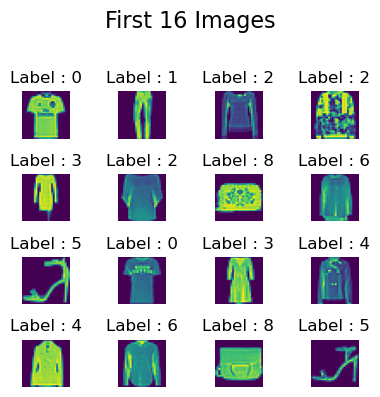

In [52]:
# Create a 4*4 grid of images
fig, axes = plt.subplots(4, 4, figsize =(4, 4))
fig.suptitle("First 16 Images", fontsize=16)

#Plot the first 16 images from the dataset
for i, ax in enumerate(axes.flat):
    img = df.iloc[i, 1:].values.reshape(28, 28) # Reshape to 28*28
    ax.imshow(img) # Display in grayscale
    ax.axis('off') # Remove axis for a cleaner look
    ax.set_title(f"Label : {df.iloc[i, 0]}") # Show the label


plt.tight_layout(rect=[0, 0, 1, 0.96]) # Adjust layout to fit the title
plt.show()

In [53]:
# Train and test Split 
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
#Scaling the feature 
X_train = X_train/255
X_test = X_test/255

In [56]:
# Create a Custom Datasrt
class CustomDataset(Dataset):
    def __init__(self, features, labels):
        self.features = torch.tensor(features, dtype= torch.float32)
        self.labels = torch.tensor(labels, dtype= torch.long)

    def __len__(self):
        return len(self.features)
    
    def __getitem__(self, index):
        return self.features[index], self.labels[index]

In [57]:
# Create train_dataset object
train_dataset = CustomDataset(X_train, y_train)

In [58]:
# Create test_dataset object
test_dataset = CustomDataset(X_test, y_test)

In [59]:
# Create train and test loader 
train_loader = DataLoader(train_dataset, batch_size=32, shuffle = True, pin_memory = True)
test_loader =DataLoader(test_dataset, batch_size=32, shuffle = False, pin_memory = True)

In [60]:
# Define NN Class
class MyNN(nn.Module):
    def __init__(self, num_features):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(num_features, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 10)
        )

    def forward(self, x):
        return self.model(x)

In [61]:
# Set Learning rate epochs
epochs = 100
learning_rate = 0.1

In [62]:
# instatiate the model
model = MyNN(X_train.shape[1])
model = model.to(device)

# loss function
criterion = nn.CrossEntropyLoss()

# optimizer
optimizer = optim.SGD(model.parameters(), lr= learning_rate)

In [63]:
len(train_loader)

250

In [64]:
# Training Loop 
for epoch in range(epochs):
    total_epoch_loss = 0
    for batch_features, batch_labels in train_loader:
        #move data to gpu
        batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)
        #forward pass
        outputs = model(batch_features)
        #Calc Loss
        loss = criterion(outputs, batch_labels)
        # Back pass
        optimizer.zero_grad()
        loss.backward()

        #update grads
        optimizer.step()
        total_epoch_loss = total_epoch_loss + loss.item()
    avg_loss = total_epoch_loss/len(train_loader)
    print(f"Epoch : {epoch + 1}, Loss : {avg_loss}")


Epoch : 1, Loss : 1.1000939486026764
Epoch : 2, Loss : 0.656216029047966
Epoch : 3, Loss : 0.5453183851838111
Epoch : 4, Loss : 0.49159689199924467
Epoch : 5, Loss : 0.4559839419722557
Epoch : 6, Loss : 0.42980446308851245
Epoch : 7, Loss : 0.4063414915800095
Epoch : 8, Loss : 0.3844023458659649
Epoch : 9, Loss : 0.36395551162958145
Epoch : 10, Loss : 0.36061273381114006
Epoch : 11, Loss : 0.3368993694931269
Epoch : 12, Loss : 0.3265316769480705
Epoch : 13, Loss : 0.30621586793661115
Epoch : 14, Loss : 0.30425492918491365
Epoch : 15, Loss : 0.2921517092883587
Epoch : 16, Loss : 0.2795243249833584
Epoch : 17, Loss : 0.2681992142498493
Epoch : 18, Loss : 0.2643796207457781
Epoch : 19, Loss : 0.2559828274846077
Epoch : 20, Loss : 0.2509347227141261
Epoch : 21, Loss : 0.23646236541867255
Epoch : 22, Loss : 0.22826809199154377
Epoch : 23, Loss : 0.22134250593185426
Epoch : 24, Loss : 0.21615512758493424
Epoch : 25, Loss : 0.20580201261490583
Epoch : 26, Loss : 0.19610941907018423
Epoch : 27

In [65]:
# Set the model Eval Mode

model.eval() # During training we will use batch normalization, drop out where it will be stopped if we tell the model to be in .eval() function

MyNN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [66]:
# Evaluation Code
total = 0
correct = 0

with torch.no_grad():
    for batch_features, batch_labels in test_loader:
        #Move data to gpu
        batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)
        outputs = model(batch_features)
        _, predicted = torch.max(outputs, 1)
        total = total + batch_labels.shape[0]
        correct = correct + (predicted == batch_labels).sum().item()

print(correct/total)


0.862
